In [ ]:
# %pip install tensorflow
# %pip install matplotlib

# Importações
* Mnist é uma base de dados embutida no Keras

In [96]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
mnist = tf.keras.datasets.mnist

# Dividindo dados em teste e treino

In [52]:
(XTreino, YTreino), (XTeste, YTeste) = mnist.load_data()

# Visualizar Dados

In [ ]:
print(XTreino.shape)
print(XTeste.shape)

In [13]:
def verNumero(classe, X, y):
    nImagens = 8
    print(f"Classe selecionada: {classe}")
    Xselecionados = X[y == classe]
    fig, axs = plt.subplots(nrows=1, ncols=nImagens, figsize=(nImagens, 1))
    for i in range(nImagens):
        posAleatoria = random.randint(0, len(Xselecionados)-1)
        axs[i].imshow(Xselecionados[posAleatoria,:,:], cmap=plt.get_cmap("gray"))
        axs[i].axis("off")

Classe selecionada: 1


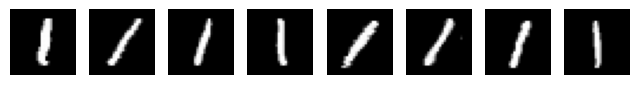

In [45]:
verNumero(1, XTeste, YTeste)

In [44]:
contagem = np.bincount(YTreino)# Contar quantas imagens tem de cada número
print(contagem)# Se tiver equilibrado diminui o Viés

[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


# Tratando os dados para treinamento

In [55]:
YTreinoT = tf.keras.utils.to_categorical(YTreino, 10)
YTesteT = tf.keras.utils.to_categorical(YTeste, 10)

numClasses = len(YTreinoT[0])
print(f"Número de Classes: {numClasses}")

Número de Classes: 10


In [ ]:
print(YTreino[5])
print(YTreinoT[5])

In [60]:
#Deixar os números entre 0 e 1
XTreinoT = XTreino/255.0
XTesteT = XTeste/255.0

In [ ]:
print(XTeste[0,:,:])
# print(XTesteT[0,:,:])

In [67]:
numPixels = 28 * 28
XTreinoT = XTreinoT.reshape(XTreinoT.shape[0], numPixels)
XTesteT = XTesteT.reshape(XTesteT.shape[0], numPixels)

print(XTreinoT.shape)
print(XTesteT.shape)

(60000, 784)
(10000, 784)


# Treino

## Estrutura da Rede

In [69]:
modelo = tf.keras.models.Sequential()
modelo.add(tf.keras.layers.Dense(400, input_dim= numPixels, activation="relu"))
modelo.add(tf.keras.layers.Dense(250, activation="relu"))
modelo.add(tf.keras.layers.Dense(numClasses, activation="softmax"))
modelo.compile(tf.keras.optimizers.Adam(learning_rate=0.01), loss="categorical_crossentropy", metrics=["accuracy"])
print(modelo.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 400)               314000    
                                                                 
 dense_4 (Dense)             (None, 250)               100250    
                                                                 
 dense_5 (Dense)             (None, 10)                2510      
                                                                 
Total params: 416,760
Trainable params: 416,760
Non-trainable params: 0
_________________________________________________________________
None


## Treinando

In [260]:
historico = modelo.fit(XTreinoT,
                       YTreinoT, 
                       validation_split=0.15,
                       epochs=50, 
                       batch_size=200, 
                       verbose=1, 
                       shuffle=1)

Epoch 1/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0466 - accuracy: 0.9878 - val_loss: 0.1839 - val_accuracy: 0.9713
Epoch 2/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0390 - accuracy: 0.9902 - val_loss: 0.1689 - val_accuracy: 0.9754
Epoch 3/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0355 - accuracy: 0.9910 - val_loss: 0.1811 - val_accuracy: 0.9757
Epoch 4/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0454 - accuracy: 0.9894 - val_loss: 0.1964 - val_accuracy: 0.9727
Epoch 5/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0462 - accuracy: 0.9890 - val_loss: 0.1847 - val_accuracy: 0.9764
Epoch 6/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0298 - accuracy: 0.9922 - val_loss: 0.1969 - val_accuracy: 0.9716
Epoch 7/50
255/255 [==============================] - 1s 5ms/step - loss: 0.0427 - accuracy: 0.9898 - val_loss: 0.1538 - val_accuracy: 0.9771
Epoch 

Text(0.5, 0, 'Epoch')

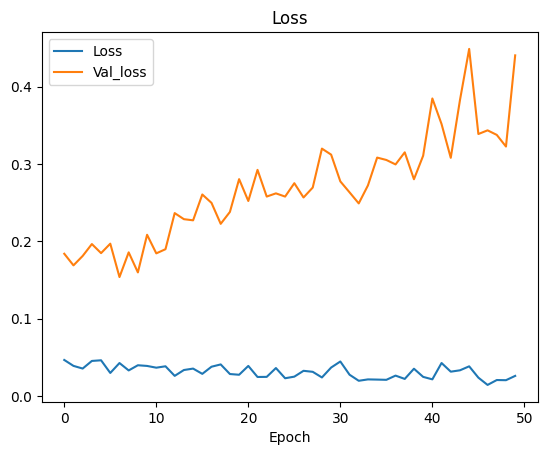

In [261]:
plt.plot(historico.history["loss"])
plt.plot(historico.history["val_loss"])
plt.legend(["Loss", "Val_loss"])
plt.title("Loss")
plt.xlabel("Epoch")

# Testando o Modelo

In [304]:
score = modelo.evaluate(XTesteT, YTesteT, verbose=0)
print(type(score))
print(f"Teste Score: {score[0]}")
print(f"Teste Acurácia: {score[1]}")

<class 'list'>
Teste Score: 0.35860565304756165
Teste Acurácia: 0.9782000184059143


In [292]:
# modelo.save("Modelo97.h5")

9583


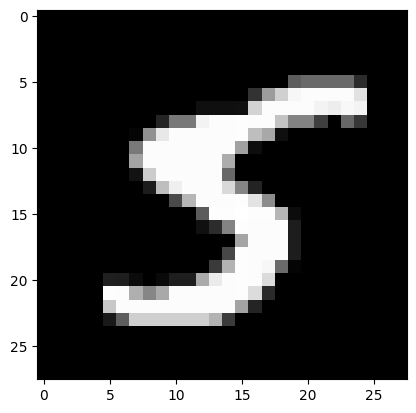

In [416]:
posAleatoria = random.randint(0, len(XTeste))
print(posAleatoria)
imagem = XTeste[posAleatoria,:,:]
plt.imshow(imagem, cmap=plt.get_cmap("gray"))
#Tratamento
imagem = imagem/255.0
imagem = imagem.reshape(1, numPixels)

In [417]:
# Previsão 
previsao = modelo.predict(imagem)[0]
indices = sorted(range(len(previsao)), key=lambda i: previsao[i], reverse=True)[:3]
print("Porcentagem de Certeza:")
for count in indices:
    print(f"Número {count} --> {previsao[count]*100:.5f}%")

1/1 [==============================] - 0s 20ms/step
Porcentagem de Certeza:
Número 5 --> 100.00000%
Número 0 --> 0.00000%
Número 1 --> 0.00000%
